# Keras Regressor 


*usefull links*  
* [Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)
+ [Keras Regressor](https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/)

In [11]:
# imports
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# random forests
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score,mean_absolute_error
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [12]:
# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [13]:
# Load the data

###################
#      TRAIN      #
###################

url = 'https://raw.githubusercontent.com/DGuilherme/TurbofanVibration/master/Dataset/ALLtrainMescla5D.csv'
train_data = pd.read_csv(url,delimiter=r",")
#print(train_data)

model_mapping  ={'model1': 1, 'model2': 2, 'model3': 3, 'model4': 4}
train_data = train_data.replace({'model': model_mapping})

failure_mapping = {'none': 0, 'comp1': 1, 'comp2': 2, 'comp3': 3, 'comp4': 4}
train_data = train_data.replace({'failure': failure_mapping})

# remover colunas
train_data = train_data.drop('datetime',axis=1)
train_data = train_data.astype('float32')


n_features = 31
n_target = 35
target = 'RUL_I'

feature_list = [train_data.columns[i] for i in range(0,n_features)]

X_train = train_data.iloc[:, 0:n_features].values.astype('float32')

# generate labels
Y_train = train_data.iloc[:, n_target-1:n_target].values.astype('float32').ravel()

###################
#      TEST       #
###################

#https://raw.githubusercontent.com/DGuilherme/TurbofanVibration/master/Dataset/ALLtrainMescla5D.csv

url = 'https://raw.githubusercontent.com/DGuilherme/TurbofanVibration/master/Dataset/ALLtrainMescla5D.csv'
test_data = pd.read_csv(url,delimiter=r",")

model_mapping  ={'model1': 1, 'model2': 2, 'model3': 3, 'model4': 4}
test_data = test_data.replace({'model': model_mapping})

failure_mapping = {'none': 0, 'comp1': 1, 'comp2': 2, 'comp3': 3, 'comp4': 4}
test_data = test_data.replace({'failure': failure_mapping})

# remover colunas
test_data = test_data.drop('datetime',axis=1)
test_data = test_data.astype('float32')


X_test = test_data.iloc[:, 0:n_features].values.astype('float32')
# generate labels
Y_test = test_data.iloc[:, n_target-1:n_target].values.astype('float32').ravel()



In [14]:
from sklearn.preprocessing import MinMaxScaler



## Remove features
train_useless_features = train_data[['DI','RUL']]
train_data = train_data.drop(['DI','RUL'],axis=1)

train_RUL_I = train_data["RUL_I"]
train_data = train_data.drop("RUL_I",axis=1)

test_useless_features = test_data[['DI','RUL']]
test_data = test_data.drop(['DI','RUL'],axis=1)

test_RUL_I = test_data["RUL_I"]
test_data = test_data.drop("RUL_I",axis=1)

trans = MinMaxScaler()
num_cols = train_data.columns[train_data.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
# normaliza train
train_data[num_cols] = trans.fit_transform(train_data[num_cols])

#normaliza test
test_data[num_cols] = trans.transform(test_data[num_cols])



In [15]:
from sklearn.model_selection import train_test_split
# split the dataset in evaluation and test set
X_eva, X_test, Y_eva, Y_test = train_test_split(test_data, test_RUL_I, test_size=0.77, random_state=42)
print("Number of samples for evaluation: %d, Number of features used: %d " % (X_eva.shape[0], X_eva.shape[1])) 
print("Number of samples for testing: %d, Number of features used: %d " % (X_test.shape[0], X_test.shape[1])) 


Number of samples for evaluation: 4799, Number of features used: 32 
Number of samples for testing: 16068, Number of features used: 32 


In [16]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape=(train_data.shape[1],))
dense_layer_1 = Dense(128, activation='relu')(input_layer)
dense_layer_2 = Dense(64, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(32, activation='relu')(dense_layer_2)
dense_layer_4 = Dense(16, activation='relu')(dense_layer_3)
output = Dense(1)(dense_layer_4)

model = Model(inputs=input_layer, outputs=output)
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="mean_squared_error" , optimizer=optimizer, metrics=["mean_squared_error"])


In [17]:
history = model.fit(train_data, train_RUL_I, batch_size=500, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
34/34 [==============================] - 0s 4ms/step - loss: 3154.9966 - mean_squared_error: 3154.9966 - val_loss: 1211.6799 - val_mean_squared_error: 1211.6799
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1866.7407 - mean_squared_error: 1866.7407 - val_loss: 1073.8163 - val_mean_squared_error: 1073.8163
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1703.3756 - mean_squared_error: 1703.3756 - val_loss: 1057.0259 - val_mean_squared_error: 1057.0259
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1590.8558 - mean_squared_error: 1590.8558 - val_loss: 925.5984 - val_mean_squared_error: 925.5984
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1520.7638 - mean_squared_error: 1520.7638 - val_loss: 916.0183 - val_mean_squared_error: 916.0183
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1498.7437 - mean_squared_error: 1498.7437 - val_loss: 916.5284 - v

34/34 [==============================] - 0s 2ms/step - loss: 780.6743 - mean_squared_error: 780.6743 - val_loss: 878.8618 - val_mean_squared_error: 878.8618
Epoch 47/100
34/34 [==============================] - 0s 2ms/step - loss: 771.9147 - mean_squared_error: 771.9147 - val_loss: 872.8536 - val_mean_squared_error: 872.8536
Epoch 48/100
34/34 [==============================] - 0s 2ms/step - loss: 769.2236 - mean_squared_error: 769.2236 - val_loss: 848.5066 - val_mean_squared_error: 848.5066
Epoch 49/100
34/34 [==============================] - 0s 2ms/step - loss: 771.5975 - mean_squared_error: 771.5975 - val_loss: 856.2009 - val_mean_squared_error: 856.2009
Epoch 50/100
34/34 [==============================] - 0s 2ms/step - loss: 771.5743 - mean_squared_error: 771.5743 - val_loss: 890.0228 - val_mean_squared_error: 890.0228
Epoch 51/100
34/34 [==============================] - 0s 2ms/step - loss: 744.9227 - mean_squared_error: 744.9227 - val_loss: 913.9131 - val_mean_squared_error: 91

34/34 [==============================] - 0s 2ms/step - loss: 480.5901 - mean_squared_error: 480.5901 - val_loss: 1038.0208 - val_mean_squared_error: 1038.0208
Epoch 95/100
34/34 [==============================] - 0s 2ms/step - loss: 471.1436 - mean_squared_error: 471.1436 - val_loss: 1036.5592 - val_mean_squared_error: 1036.5592
Epoch 96/100
34/34 [==============================] - 0s 2ms/step - loss: 467.6966 - mean_squared_error: 467.6966 - val_loss: 1028.5088 - val_mean_squared_error: 1028.5088
Epoch 97/100
34/34 [==============================] - 0s 2ms/step - loss: 458.5556 - mean_squared_error: 458.5556 - val_loss: 1061.6641 - val_mean_squared_error: 1061.6641
Epoch 98/100
34/34 [==============================] - 0s 2ms/step - loss: 453.9195 - mean_squared_error: 453.9195 - val_loss: 1074.9011 - val_mean_squared_error: 1074.9011
Epoch 99/100
34/34 [==============================] - 0s 2ms/step - loss: 455.8286 - mean_squared_error: 455.8286 - val_loss: 1075.6053 - val_mean_square

In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

model.evaluate(train_data, train_RUL_I, batch_size=1000)

pred_train = model.predict(train_data)
print('Train')
print(' Square Error:',np.sqrt(mean_squared_error(train_RUL_I,pred_train)))
print(' Absolute Error:',mean_absolute_error(train_RUL_I,pred_train))

pred = model.predict(X_test)
print('Test')
print(' Square Error:',np.sqrt(mean_squared_error(Y_test,pred)))
print(' Absolute Error:',mean_absolute_error(Y_test,pred))


pred = model.predict(X_eva)
print('Evaluation')
print(' Square Error:',np.sqrt(mean_squared_error(Y_eva,pred)))
print(' Absolute Error:',mean_absolute_error(Y_eva,pred))

21/21 [==============================] - 0s 810us/step - loss: 563.1776 - mean_squared_error: 563.1776
Train
 Square Error: 23.731363
 Absolute Error: 17.071533
Test
 Square Error: 23.76319
 Absolute Error: 17.078596
Evaluation
 Square Error: 23.62449
 Absolute Error: 17.047884


In [19]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

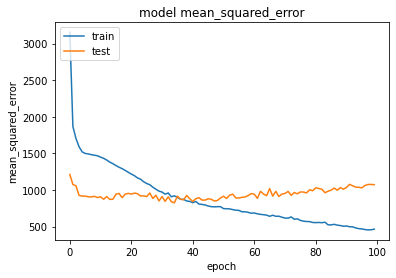

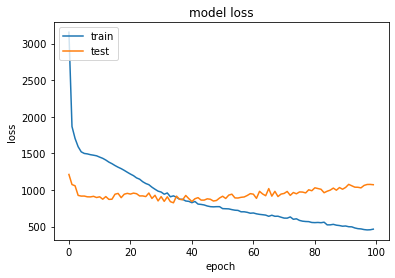

In [20]:
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
